In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import matplotlib.pyplot as plt

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
data = pd.read_csv('london_flows.csv')

In [3]:
data.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [4]:
G = nx.from_pandas_edgelist(data,'station_origin','station_destination', ['flows', 'population','jobs','distance'])

In [5]:
type(G)

networkx.classes.graph.Graph

In [6]:
print(nx.info(G))

Graph with 399 nodes and 31718 edges


/tmp/ipykernel_187/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [7]:
# To check node attributes:
list(G.edges(data = True))[0:3]

[('Abbey Road',
  'Bank and Monument',
  {'flows': 0,
   'population': 29494,
   'jobs': 345,
   'distance': 8131.525096864179}),
 ('Abbey Road',
  'Beckton',
  {'flows': 0,
   'population': 1179,
   'jobs': 345,
   'distance': 8510.121773987867}),
 ('Abbey Road',
  'Blackwall',
  {'flows': 0, 'population': 952, 'jobs': 345, 'distance': 3775.448872076439})]

In [8]:
list(G.nodes(data = True))[0:3]

[('Abbey Road', {}), ('Bank and Monument', {}), ('Beckton', {})]

# PART 1
## I. Topological Network

### I.1 Centrality Measures

In [10]:
#Let us compute the degree centrality
deg_t=nx.degree_centrality(G)


# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(G,deg_t,'degree_t')

# To check nodes attributes
list(G.nodes(data=True))[0:10]

[('Abbey Road', {'degree_t': 0.08542713567839195}),
 ('Bank and Monument', {'degree_t': 0.7663316582914573}),
 ('Beckton', {'degree_t': 0.10804020100502512}),
 ('Blackwall', {'degree_t': 0.10050251256281408}),
 ('Canary Wharf', {'degree_t': 0.771356783919598}),
 ('Canning Town', {'degree_t': 0.7638190954773869}),
 ('Crossharbour', {'degree_t': 0.10552763819095477}),
 ('Custom House', {'degree_t': 0.11055276381909548}),
 ('Cutty Sark', {'degree_t': 0.11055276381909548}),
 ('Cyprus', {'degree_t': 0.10552763819095477})]

In [11]:
# To dataframe using the nodes as the index
df_degree_t = pd.DataFrame(index=G.nodes())
df_degree_t['degree_t'] = pd.Series(nx.get_node_attributes(G, 'degree_t'))

df_degree_t_sorted = df_degree_t.sort_values(["degree_t"], ascending=False)
df_degree_t_sorted[0:10]

,degree_t
Stratford,0.922111
Highbury & Islington,0.806533
Whitechapel,0.781407
West Brompton,0.776382
Canada Water,0.771357
Canary Wharf,0.771357
Liverpool Street,0.768844
Bank and Monument,0.766332
Richmond,0.766332
Canning Town,0.763819


#### __Betweenness centrality__

In [12]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_t,'betweenness_t')

In [13]:
# To Dataframe using the nodes as the index
df_bet_t = pd.DataFrame(index=G.nodes())
df_bet_t['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_bet_t_sorted = df_bet_t.sort_values(["betweenness_t"], ascending=False)
df_bet_t_sorted[0:10]

,betweenness_t
Stratford,7785.967073
Liverpool Street,2710.377160
Canary Wharf,2208.627931
Bank and Monument,2208.627931
Canning Town,2192.848026
West Ham,1939.641831
Highbury & Islington,1818.904025
Whitechapel,1554.965946
Canada Water,1413.977663
Shadwell,1348.588902


#### __Closeness centrality__


In [14]:
#topological closeness centrality   in terms of number of stations near by
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

In [15]:
# To ataframe using the nodes as the index
df_clo_t = pd.DataFrame(index=G.nodes())
df_clo_t['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_clo_t_sorted = df_clo_t.sort_values(["closeness_t"], ascending=False)
df_clo_t_sorted[0:10]

,closeness_t
Stratford,0.927739
Highbury & Islington,0.836134
Whitechapel,0.820619
West Brompton,0.817248
Canada Water,0.813906
Richmond,0.810591
Canary Wharf,0.810591
Bank and Monument,0.810591
Liverpool Street,0.808943
Canning Town,0.808943


In [16]:
top_10_degree = df_degree_t_sorted[0:10].reset_index().rename(columns={'index': 'degree_t'})
top_10_bet = df_bet_t_sorted[0:10].reset_index().rename(columns={'index': 'betweenness_t'})
top_10_clo = df_clo_t_sorted[0:10].reset_index().rename(columns={'index': 'closeness_t'})

# Concatenate the top 10 nodes for each centrality measure into a single table
result = pd.concat([top_10_degree, top_10_bet, top_10_clo], axis=1)

# Show the resulting table
print(result)

               degree_t  degree_t         betweenness_t  betweenness_t  \
0             Stratford  0.922111             Stratford    7785.967073   
1  Highbury & Islington  0.806533      Liverpool Street    2710.377160   
2           Whitechapel  0.781407          Canary Wharf    2208.627931   
3         West Brompton  0.776382     Bank and Monument    2208.627931   
4          Canada Water  0.771357          Canning Town    2192.848026   
5          Canary Wharf  0.771357              West Ham    1939.641831   
6      Liverpool Street  0.768844  Highbury & Islington    1818.904025   
7     Bank and Monument  0.766332           Whitechapel    1554.965946   
8              Richmond  0.766332          Canada Water    1413.977663   
9          Canning Town  0.763819              Shadwell    1348.588902   

            closeness_t  closeness_t  
0             Stratford     0.927739  
1  Highbury & Islington     0.836134  
2           Whitechapel     0.820619  
3         West Brompton     0

### I.3 Nodes Removal

#### Degree Centrality

##### Strategy A

In [20]:
G1 = G.copy()
global_efficiency_DA = []
global_efficiency_DA.append(nx.global_efficiency(G1))
global_clustering_DA = []
global_clustering_DA.append(nx.average_clustering(G1))
diff_efficiency_DA = []
diff_clustering_DA = []
                           
for i in range (1,11):
    deg_t_values=[(j[1]['degree_t']) for j in G1.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G1.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxdeg_t=[n for n in G1.nodes() if G1.nodes[n]['degree_t'] == max(deg_t_values)]
    print('Removing' + str(maxdeg_t))
    G1.remove_nodes_from(maxdeg_t)
    eff = nx.global_efficiency(G1)
    clu = nx.average_clustering(G1)
    # number of nodes after the removal
    l2=list(G1.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_DA.append(eff)
    diff_efficiency_DA.append(global_efficiency_DA[i-1]-eff)
    global_clustering_DA.append(clu)
    diff_clustering_DA.append(global_clustering_DA[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Highbury & Islington']
After removing, there are 397 nodes.
Global efficiency is 0.6911262074989025 after removing.
Global clustering coefficient is 0.8445180585366275 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Whitechapel']
After removing, there are 396 nodes.
Global efficiency is 0.6901184844221805 after removing.
Global clustering coefficient is 0.8438195931336735 after removing.
---------------------------------------------
Before removing, there are 396 nodes.
Removing['West Brompton']
After removing, there are 395 nodes.
Global efficiency is 0.6891173509819285 after removing.
Global clustering coefficient

##### Strategy B

In [21]:
print(diff_efficiency_DA)

[0.005491141157937474, 0.0010795737160560481, 0.0010077230767220335, 0.001001133440251989, 0.003916298550913355, 0.010566415967898868, 0.002196431994229253, 0.0030568495101102044, 0.0016648911924047605, 0.0011348140363505177]


In [22]:
print(diff_clustering_DA)

[0.0008937392080909934, 0.0007291040802503979, 0.0006984654029540405, 0.00036304575179624266, 0.001376455846548219, 0.00047653276805148526, 0.001066877999816529, 0.0006205671994742312, -0.0001639127959086606, 0.0005852609591170399]


In [23]:
G2 = G.copy()
global_efficiency_DB = []
global_efficiency_DB.append(nx.global_efficiency(G2))
global_clustering_DB = []
global_clustering_DB.append(nx.average_clustering(G2)) 
diff_efficiency_DB = []
diff_clustering_DB = []
for i in range (1,11):
    deg_t_values=[(j[1]['degree_t']) for j in G2.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G2.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxdeg_t=[n for n in G2.nodes() if G2.nodes[n]['degree_t'] == max(deg_t_values)]
    print('Removing' + str(maxdeg_t))
    G2.remove_nodes_from(maxdeg_t)
    eff = nx.global_efficiency(G2)
    clu = nx.average_clustering(G2)
    # number of nodes after the removal
    l2=list(G2.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    # # # to check which is the one missing:
    # rem_nodes=list(set(l1) - set(l2))
    # print(str(rem_nodes) + ' is removed.')
    global_efficiency_DB.append(eff)
    global_clustering_DB.append(clu)
    diff_efficiency_DB.append(global_efficiency_DB[i-1]-eff)
    diff_clustering_DB.append(global_clustering_DB[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')
    deg_t=nx.degree_centrality(G2)
    nx.set_node_attributes(G2,deg_t,'degree_t')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Highbury & Islington']
After removing, there are 397 nodes.
Global efficiency is 0.6911262074989025 after removing.
Global clustering coefficient is 0.8445180585366275 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Whitechapel']
After removing, there are 396 nodes.
Global efficiency is 0.6901184844221805 after removing.
Global clustering coefficient is 0.8438195931336735 after removing.
---------------------------------------------
Before removing, there are 396 nodes.
Removing['West Brompton']
After removing, there are 395 nodes.
Global efficiency is 0.6891173509819285 after removing.
Global clustering coefficient

In [19]:
global_efficiency_DA == global_efficiency_DB
global_clustering_DA == global_clustering_DB

True

#### Betweeness Centrality

##### Strategy A

In [24]:
G3 = G.copy()
global_efficiency_BA = []
global_efficiency_BA.append(nx.global_efficiency(G3))
global_clustering_BA = []
global_clustering_BA.append(nx.average_clustering(G3))
diff_efficiency_BA = []
diff_clustering_BA = []                            
for i in range (1,11):
    bet_t_values=[(j[1]['betweenness_t']) for j in G3.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G3.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxbet_t=[n for n in G3.nodes() if G3.nodes[n]['betweenness_t'] == max(bet_t_values)]
    print('Removing' + str(maxbet_t))
    G3.remove_nodes_from(maxbet_t)
    eff = nx.global_efficiency(G3)
    clu = nx.average_clustering(G3)
    # number of nodes after the removal
    l2=list(G3.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_BA.append(eff)
    global_clustering_BA.append(clu)
    diff_efficiency_BA.append(global_efficiency_BA[i-1]-eff)
    diff_clustering_BA.append(global_clustering_BA[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Liverpool Street']
After removing, there are 397 nodes.
Global efficiency is 0.6818256027952448 after removing.
Global clustering coefficient is 0.8447423087357954 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Bank and Monument', 'Canary Wharf']
After removing, there are 395 nodes.
Global efficiency is 0.6797500481910923 after removing.
Global clustering coefficient is 0.8436295898830374 after removing.
---------------------------------------------
Before removing, there are 395 nodes.
Removing['Canning Town']
After removing, there are 394 nodes.
Global efficiency is 0.6767864446767804 after removing.
Global clust

##### Strategy B

In [25]:
G4 = G.copy()
global_efficiency_BB = []
global_efficiency_BB.append(nx.global_efficiency(G4))
global_clustering_BB = []
global_clustering_BB.append(nx.average_clustering(G4))
diff_efficiency_BB = []
diff_clustering_BB = []                                  
for i in range (1,11):
    bet_t_values=[(j[1]['betweenness_t']) for j in G4.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G4.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxbet_t=[n for n in G4.nodes() if G4.nodes[n]['betweenness_t'] == max(bet_t_values)]
    print('Removing' + str(maxbet_t))
    G4.remove_nodes_from(maxbet_t)
    eff = nx.global_efficiency(G4)
    clu = nx.average_clustering(G4)
    # number of nodes after the removal
    l2=list(G4.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_BB.append(eff)
    global_clustering_BB.append(clu)
    diff_efficiency_BB.append(global_efficiency_BB[i-1]-eff)
    diff_clustering_BB.append(global_clustering_BB[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')
    bet_t=nx.betweenness_centrality(G4)
    nx.set_node_attributes(G4,bet_t,'betweenness_t')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Liverpool Street']
After removing, there are 397 nodes.
Global efficiency is 0.6818256027952448 after removing.
Global clustering coefficient is 0.8447423087357954 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Upminster']
After removing, there are 396 nodes.
Global efficiency is 0.6620636747218582 after removing.
Global clustering coefficient is 0.8427810980335991 after removing.
---------------------------------------------
Before removing, there are 396 nodes.
Removing['Bank and Monument', 'Canary Wharf']
After removing, there are 394 nodes.
Global efficiency is 0.6599049353534123 after removing.
Global clusteri

In [26]:
print(global_efficiency_BA == global_efficiency_BB)
print(global_clustering_BA == global_clustering_BB)

False
False


#### Closeness Centrality

##### Strategy A

In [27]:
G5 = G.copy()
global_efficiency_CA = []
global_efficiency_CA.append(nx.global_efficiency(G5))
global_clustering_CA = []
global_clustering_CA.append(nx.average_clustering(G5))
diff_efficiency_CA = []
diff_clustering_CA = []                                 
for i in range (1,11):
    clo_t_values=[(j[1]['closeness_t']) for j in G5.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G5.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxclo_t=[n for n in G5.nodes() if G5.nodes[n]['closeness_t'] == max(clo_t_values)]
    print('Removing' + str(maxclo_t))
    G5.remove_nodes_from(maxclo_t)
    eff = nx.global_efficiency(G5)
    clu = nx.average_clustering(G5)
    # number of nodes after the removal
    l2=list(G5.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_CA.append(eff)
    global_clustering_CA.append(clu)
    diff_efficiency_CA.append(global_efficiency_CA[i-1]-eff)
    diff_clustering_CA.append(global_clustering_CA[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Highbury & Islington']
After removing, there are 397 nodes.
Global efficiency is 0.6911262074989025 after removing.
Global clustering coefficient is 0.8445180585366275 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Whitechapel']
After removing, there are 396 nodes.
Global efficiency is 0.6901184844221805 after removing.
Global clustering coefficient is 0.8438195931336735 after removing.
---------------------------------------------
Before removing, there are 396 nodes.
Removing['West Brompton']
After removing, there are 395 nodes.
Global efficiency is 0.6891173509819285 after removing.
Global clustering coefficient

##### Strategy B

In [28]:
G6 = G.copy()
global_efficiency_CB = []
global_efficiency_CB.append(nx.global_efficiency(G6))
global_clustering_CB = []
global_clustering_CB.append(nx.average_clustering(G6))
diff_efficiency_CB = []
diff_clustering_CB = []                               
for i in range (1,11):
    clo_t_values=[(j[1]['closeness_t']) for j in G6.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G6.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxclo_t=[n for n in G6.nodes() if G6.nodes[n]['closeness_t'] == max(clo_t_values)]
    print('Removing' + str(maxclo_t))
    G6.remove_nodes_from(maxclo_t)
    eff = nx.global_efficiency(G6)
    clu = nx.average_clustering(G6)
    # number of nodes after the removal
    l2=list(G6.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_CB.append(eff)
    global_clustering_CB.append(clu)
    diff_efficiency_CB.append(global_efficiency_CB[i-1]-eff)
    diff_clustering_CB.append(global_clustering_CB[i-1]-clu)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('Global clustering coefficient is '+str(clu)+' after removing.')
    print('---------------------------------------------')
    clo_t=nx.closeness_centrality(G6)
    nx.set_node_attributes(G6,clo_t,'closeness_t')

Before removing, there are 399 nodes.
Removing['Stratford']
After removing, there are 398 nodes.
Global efficiency is 0.6922057812149586 after removing.
Global clustering coefficient is 0.8452471626168779 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['Highbury & Islington']
After removing, there are 397 nodes.
Global efficiency is 0.6911262074989025 after removing.
Global clustering coefficient is 0.8445180585366275 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing['Whitechapel']
After removing, there are 396 nodes.
Global efficiency is 0.6901184844221805 after removing.
Global clustering coefficient is 0.8438195931336735 after removing.
---------------------------------------------
Before removing, there are 396 nodes.
Removing['West Brompton']
After removing, there are 395 nodes.
Global efficiency is 0.6891173509819285 after removing.
Global clustering coefficient

In [26]:
print(global_efficiency_CA == global_efficiency_CB)
print(global_clustering_CA == global_clustering_CB)

True
True


In [27]:
print(global_efficiency_CB)

[0.697696922372896, 0.6922057812149586, 0.6911262074989025, 0.6901184844221805, 0.6891173509819285, 0.6861984043948822, 0.6830721140182685, 0.6693813549587768, 0.6683542449184287, 0.6665816497300215, 0.6454170872302556]


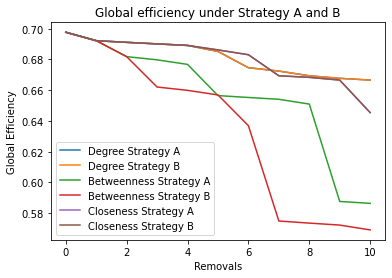

In [67]:
plt.plot(global_efficiency_DA, label='Degree Strategy A')
plt.plot(global_efficiency_DB, label='Degree Strategy B')
plt.plot(global_efficiency_BA, label='Betweenness Strategy A')
plt.plot(global_efficiency_BB, label='Betweenness Strategy B')
plt.plot(global_efficiency_CA, label='Closeness Strategy A')
plt.plot(global_efficiency_CB, label='Closeness Strategy B')
plt.xlabel('Removals')
plt.ylabel('Global Efficiency')
plt.title('Global efficiency under Strategy A and B')
plt.legend()
plt.savefig('global_efficiency.png', dpi=300)
# Show the plot
plt.show()

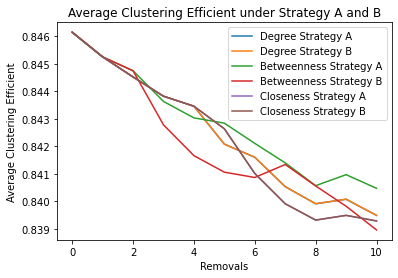

In [66]:
plt.plot(global_clustering_DA, label='Degree Strategy A')
plt.plot(global_clustering_DB, label='Degree Strategy B')
plt.plot(global_clustering_BA, label='Betweenness Strategy A')
plt.plot(global_clustering_BB, label='Betweenness Strategy B')
plt.plot(global_clustering_CA, label='Closeness Strategy A')
plt.plot(global_clustering_CB, label='Closeness Strategy B')
plt.xlabel('Removals')
plt.ylabel('Average Clustering Efficient')
plt.title('Average Clustering Efficient under Strategy A and B')
plt.legend()
plt.savefig('clustering.png', dpi=300)
# Show the plot
plt.show()

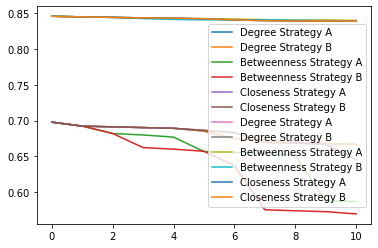

In [30]:
plt.plot(global_efficiency_DA, label='Degree Strategy A')
plt.plot(global_efficiency_DB, label='Degree Strategy B')
plt.plot(global_efficiency_BA, label='Betweenness Strategy A')
plt.plot(global_efficiency_BB, label='Betweenness Strategy B')
plt.plot(global_efficiency_CA, label='Closeness Strategy A')
plt.plot(global_efficiency_CB, label='Closeness Strategy B')
plt.plot(global_clustering_DA, label='Degree Strategy A')
plt.plot(global_clustering_DB, label='Degree Strategy B')
plt.plot(global_clustering_BA, label='Betweenness Strategy A')
plt.plot(global_clustering_BB, label='Betweenness Strategy B')
plt.plot(global_clustering_CA, label='Closeness Strategy A')
plt.plot(global_clustering_CB, label='Closeness Strategy B')
plt.legend()

# Show the plot
plt.show()

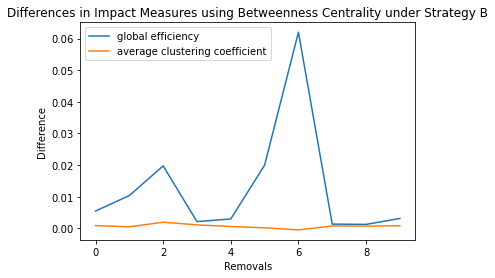

In [32]:
plt.plot(diff_efficiency_BB, label='global efficiency')
plt.plot(diff_clustering_BB, label='average clustering coefficient')
plt.title('Differences in Impact Measures using Betweenness Centrality under Strategy B')
plt.xlabel('Removals')
plt.ylabel('Difference')
plt.legend()
plt.savefig('diff.png', dpi=300)
# Show the plot
plt.show()

## Weighted network
### II.1

#### Degree Centrality

In [31]:
#Let us compute the degree centrality
deg_w=dict(G.degree(weight='flows'))


# Let us add the degree data as attribute to the nodes in the graph
# Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
nx.set_node_attributes(G,deg_w,'degree_w')

In [32]:
df_degree = pd.DataFrame(index=G.nodes())
# df['station'] = pd.Series(nx.get_node_attributes(G, 'station_origin'))
df_degree['degree_w'] = pd.Series(nx.get_node_attributes(G, 'degree_w'))

df_degree_sorted = df_degree.sort_values(["degree_w"], ascending=False)
df_degree_sorted[0:10]

,degree_w
Bank and Monument,76957
Waterloo,67026
Stratford,59441
Canary Wharf,52784
Liverpool Street,50234
Victoria,36780
London Bridge,33739
King's Cross St. Pancras,31658
Paddington,23176
Oxford Circus,22998


#### Betweenness

In [41]:
bet_w=nx.betweenness_centrality(G,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_w,'betweenness_w')

In [42]:
# To dataframe using the nodes as the index
df_bet = pd.DataFrame(index=G.nodes())
df_bet['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_bet_sorted = df_bet.sort_values(["betweenness_w"], ascending=False)
df_bet_sorted[0:10]

,betweenness_w
West Ham,9.694526e+93
West Brompton,5.748984e+93
Shepherd's Bush,2.825892e+93
Kew Gardens,1.637767e+93
Surrey Quays,8.273506e+92
Kenton,6.373616e+92
Richmond,6.086318e+92
Willesden Junction,2.206631e+92
Kentish Town West,1.419265e+92
Stratford,1.076285e+92


#### Closeness

In [35]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df_clo = pd.DataFrame(index=G.nodes())
df_clo['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_clo_sorted = df_clo.sort_values(["closeness_w"], ascending=False)
df_clo_sorted[0:10]

,closeness_w
Abbey Road,5.605634
Ruislip Manor,5.605634
Swiss Cottage,5.605634
Sudbury Town,5.605634
Sudbury Hill,5.605634
Stockwell,5.605634
Stepney Green,5.605634
Stamford Brook,5.605634
St. Paul's,5.605634
St. John's Wood,5.605634


#### II.2

In [44]:
def global_efficiency_weighted(G):
    shortest_paths = dict(nx.shortest_path_length(G, weight='flows'))
    total_efficiency = 0
    n = len(G.nodes())
    valid_pairs = 0
    
    for i in G.nodes():
        for j in G.nodes():
            if i != j and shortest_paths[i][j] != 0:
                total_efficiency += 1 / shortest_paths[i][j]
                valid_pairs += 1

    if valid_pairs == 0:
        return 0
    
    global_efficiency = total_efficiency / (valid_pairs*2)
    return global_efficiency

In [49]:
def average_weighted_shortest_path_length(G):
    shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G, weight='flows'))
    total_path_length = 0
    n = len(G.nodes())
    
    for i in G.nodes():
        for j in G.nodes():
            if i != j:
                total_path_length += shortest_paths[i][j]
    
    average_path_length = total_path_length / (n * (n - 1))
    return average_path_length


#### II.3

In [46]:
G7 = G.copy()
global_efficiency_w = []
global_efficiency_w.append(global_efficiency_weighted(G7))
diff_glob_w = []
for i in range (1,4):
    bet_w_values=[(j[1]['betweenness_w']) for j in G7.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G7.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxbet_w=[n for n in G7.nodes() if G7.nodes[n]['betweenness_w'] == max(bet_w_values)]
    print('Removing' + str(maxbet_w))
    G7.remove_nodes_from(maxbet_w)
    eff = global_efficiency_weighted(G7)
    # number of nodes after the removal
    l2=list(G7.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_w.append(eff)
    diff_glob_w.append(global_efficiency_w[i-1] - eff)
    print('Global efficiency is '+str(eff)+' after removing.')
    print('---------------------------------------------')
    bet_w=nx.betweenness_centrality(G7,weight='flows',normalized=False)
    nx.set_node_attributes(G7,bet_w,'betweenness_w')

Before removing, there are 399 nodes.
Removing['West Ham']
After removing, there are 398 nodes.
Global efficiency is 0.19800058651054422 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['West Brompton']
After removing, there are 397 nodes.
Global efficiency is 0.19799589630357473 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing["Shepherd's Bush"]
After removing, there are 396 nodes.
Global efficiency is 0.19799118201338592 after removing.
---------------------------------------------


In [47]:
for i in range (1,4):
    bet_w_values=[(j[1]['betweenness_w']) for j in G7.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G7.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxbet_w=[n for n in G7.nodes() if G7.nodes[n]['betweenness_w'] == max(bet_w_values)]
    print('Removing' + str(maxbet_w))
    G7.remove_nodes_from(maxbet_w)
    eff = global_efficiency_weighted(G7)
    # number of nodes after the removal
    l2=list(G7.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    global_efficiency_w.append(global_efficiency_weighted(G7))
    diff_glob_w.append(global_efficiency_w[i-1] - eff)
    print('Global efficiency is '+str(global_efficiency_weighted(G7))+' after removing.')
    print('---------------------------------------------')
    bet_w=nx.betweenness_centrality(G7,weight='flows',normalized=False)
    nx.set_node_attributes(G7,bet_w,'betweenness_w')

Before removing, there are 396 nodes.
Removing['Stratford']
After removing, there are 395 nodes.
Global efficiency is 0.19798644345400696 after removing.
---------------------------------------------
Before removing, there are 395 nodes.
Removing['Surrey Quays']
After removing, there are 394 nodes.
Global efficiency is 0.1979816804375473 after removing.
---------------------------------------------
Before removing, there are 394 nodes.
Removing['West Hampstead']
After removing, there are 393 nodes.
Global efficiency is 0.19797689277417194 after removing.
---------------------------------------------


In [61]:
G8 = G.copy()
average_path = []
average_path.append(average_weighted_shortest_path_length(G8))
diff_avr = []
for i in range (1,4):
    bet_w_values=[(j[1]['betweenness_w']) for j in G8.nodes(data=True)]
    # Number of existing nodes:
    l1=list(G8.nodes)
    print('Before removing, there are '+ str(len(l1)) +' nodes.')
    maxbet_w=[n for n in G8.nodes() if G8.nodes[n]['betweenness_w'] == max(bet_w_values)]
    print('Removing' + str(maxbet_w))
    G8.remove_nodes_from(maxbet_w)
    avr = average_weighted_shortest_path_length(G8)
    # number of nodes after the removal
    l2=list(G8.nodes)
    print('After removing, there are '+ str(len(l2)) + ' nodes.')
    average_path.append(avr)
    diff_avr.append(avr - average_path[i-1])
    print('Average shortest path is '+str(avr)+' after removing.')
    print('---------------------------------------------')
    bet_w=nx.betweenness_centrality(G8,weight='flows',normalized=False)
    nx.set_node_attributes(G8,bet_w,'betweenness_w')

Before removing, there are 399 nodes.
Removing['West Ham']
After removing, there are 398 nodes.
Average shortest path is 0.35601179702036634 after removing.
---------------------------------------------
Before removing, there are 398 nodes.
Removing['West Brompton']
After removing, there are 397 nodes.
Average shortest path is 0.35690659746075365 after removing.
---------------------------------------------
Before removing, there are 397 nodes.
Removing["Shepherd's Bush"]
After removing, there are 396 nodes.
Average shortest path is 0.35780590717299576 after removing.
---------------------------------------------


In [41]:
global_efficiency_w

[0.39601050563673984,
 0.39600117302108845,
 0.39599179260714945,
 0.39598236402677184,
 0.3959728869080139,
 0.3959633608750946,
 0.3959537855483439]

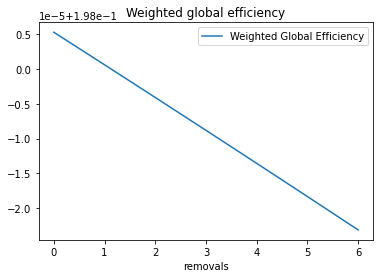

In [73]:
plt.plot(global_efficiency_w, label='Weighted Global Efficiency')

plt.legend()
plt.xlabel('removals')
plt.title('Weighted global efficiency')
plt.savefig('weighted_global.png', dpi=300)
# Show the plot
plt.show()

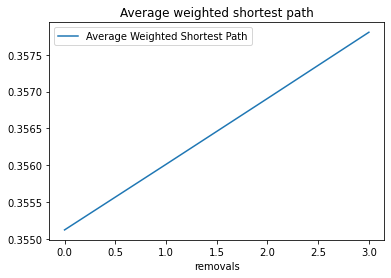

In [74]:
plt.plot(average_path, label='Average Weighted Shortest Path')
plt.legend()
plt.title('Average weighted shortest path')
plt.xlabel('removals')
plt.savefig('average.png', dpi=300)
plt.show()

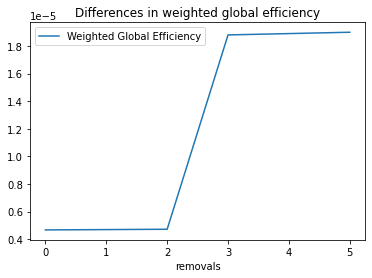

In [75]:
plt.plot(diff_glob_w, label = 'Weighted Global Efficiency')
# plt.plot(diff_avr, label='Average Weighted Shortest Path')
plt.legend()
plt.title('Differences in weighted global efficiency')
plt.xlabel('removals')
plt.savefig('diff_wglob.png', dpi=300)
plt.show()

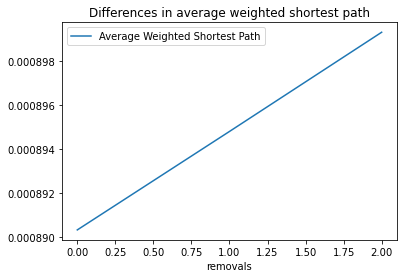

In [76]:
plt.plot(diff_avr, label='Average Weighted Shortest Path')
plt.legend()
plt.title('Differences in average weighted shortest path')
plt.xlabel('removals')
plt.savefig('diff_avr.png', dpi=300)
plt.show()

# PART 2
## III MODELS
### III.2 

In [77]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2


In [78]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE


In [79]:
import numpy as np

In [80]:
cdata = data[data['jobs']!= 0]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61474 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61474 non-null  object 
 1   station_destination  61474 non-null  object 
 2   flows                61474 non-null  int64  
 3   population           61474 non-null  int64  
 4   jobs                 61474 non-null  int64  
 5   distance             61474 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.8+ MB


In [49]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61454 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61454 non-null  object 
 1   station_destination  61454 non-null  object 
 2   flows                61454 non-null  int64  
 3   population           61454 non-null  int64  
 4   jobs                 61454 non-null  int64  
 5   distance             61454 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [81]:
cdata = cdata[cdata['population'] != 0]

In [82]:
cdata = cdata[cdata['distance'] != 0]

In [52]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61413 entries, 0 to 61473
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61413 non-null  object 
 1   station_destination  61413 non-null  object 
 2   flows                61413 non-null  int64  
 3   population           61413 non-null  int64  
 4   jobs                 61413 non-null  int64  
 5   distance             61413 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [53]:
cdatasubmat = pd.pivot_table(cdata, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [90]:
T1 = sum(cdata["flows"])
T1

1542283

#### Unconstrained

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdata, 
                  family=sm.families.Poisson()).fit()



In [56]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61409
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2785e+06
Date:                Wed, 26 Apr 2023   Deviance:                   2.3848e+06
Time:                        17:03:32   Pearson chi2:                 4.76e+06
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.7475      0.014   -273.

In [101]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta*cdata["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdata["fitted"] = predictions_summary_frame["mean"]

In [106]:
#round the numbers so that we don't get a half of a person
cdata["unconstrainedEst2"] = round(cdata["unconstrainedEst2"], 0)
#convert to integers
cdata["unconstrainedEst2"] = cdata["unconstrainedEst2"].astype(int)

In [107]:
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst2"])

1542355

In [60]:
cdatasubmat2 = cdata.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [108]:
rsaquare_uncon = CalcRSqaured(cdata['flows'],cdata['unconstrainedEst2'])

In [109]:
rmse_uncon = CalcRMSE(cdata['flows'],cdata['unconstrainedEst2'])

In [110]:
print(rsaquare_uncon)
print(rmse_uncon)

0.3211903577361908
108.334


### IV.
#### IV.1

In [88]:
cdata_a = cdata.copy()
canary_wharf_index = cdata_a.loc[cdata_a['station_destination'] == 'Canary Wharf'].index

# Update the jobs at Canary Wharf by reducing them by 50%
cdata_a.loc[canary_wharf_index, 'jobs'] = cdata_a.loc[canary_wharf_index, 'jobs'] * 0.5

In [96]:
cdata_a

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832


In [97]:
#first assign the parameter values from the model to the appropriate variables
 
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]
T2 = (cdata_a["population"]**alpha)*(cdata_a["jobs"]**gamma)*(cdata_a["distance"]**-beta)
k = T1/sum(T2)
#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata_a["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdata_a["log_population"] 
                                       + gamma*cdata_a["log_jobs"] 
                                       - beta*cdata_a["log_distance"])



In [99]:
#round the numbers so that we don't get a half of a perso
cdata_a["unconstrainedEst2"] = round(cdata_a["unconstrainedEst2"], 0)
#convert to integers
cdata_a["unconstrainedEst2"] = cdata_a["unconstrainedEst2"].astype(int)

In [100]:
#check that the sum of these estimates make sense
sum(cdata_a["unconstrainedEst2"])

1542355

In [127]:
cdatasubmat5 = cdata_a.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,333
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3862
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6107
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3707
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2648


In [128]:
cdata_a

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,unconstrainedEst2,change_scA,abs_diff_scA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,50,inf,50
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,1,0.000000,0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,2,-33.333333,1
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,6.395262,10.981421,8.534348,53,5200.000000,52
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,32,-13.513514,5
...,...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,22,-82.677165,105
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,42,-93.092105,566
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,5,-16.666667,1
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,14,-82.716049,67


In [140]:

scenarioA = cdata_a[['station_origin','station_destination','unconstrainedEst2']]
scenarioA = pd.DataFrame(scenarioA)
scenarioA.rename(columns={'unconstrainedEst2': 'flows'}, inplace = True)
scenarioA

,station_origin,station_destination,flows
0,Abbey Road,Bank and Monument,50
1,Abbey Road,Beckton,1
2,Abbey Road,Blackwall,2
3,Abbey Road,Canary Wharf,53
4,Abbey Road,Canning Town,32
...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,22
61470,Woolwich Arsenal,West Ham,42
61471,Woolwich Arsenal,West India Quay,5
61472,Woolwich Arsenal,West Silvertown,14


#### IV.2

In [115]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta1 = 0.8
beta2 = 1

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["inc_cost1"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta1*cdata["log_distance"])
cdata["inc_cost2"] = np.exp(K 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta2*cdata["log_distance"])

In [244]:

alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta1 = 0.8
beta2 = 1
T3 = (cdata["population"]**alpha)*(cdata["jobs"]**gamma)*(cdata["distance"]**-beta1)
T4 = (cdata["population"]**alpha)*(cdata["jobs"]**gamma)*(cdata["distance"]**-beta2)
k1 = T1/sum(T3)
k2 = T1/sum(T4)
#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["conserve_beta1"] = np.exp(k1 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta1*cdata["log_distance"])
cdata["conserve_beta2"] = np.exp(k2 
                                       + alpha*cdata["log_population"] 
                                       + gamma*cdata["log_jobs"] 
                                       - beta2*cdata["log_distance"])

In [245]:
sum(cdata['conserve_beta1'])

15585663.430987356

In [116]:
cdatasubmat3 = cdata.pivot_table(values ="inc_cost1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.019532,99.439086
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.080609,NaN,NaN,66.309709
Acton Town,NaN,NaN,NaN,3.689040,3.700780,NaN,1.643920,0.145619,NaN,4.030413,...,3.339073,0.607511,1.082676,2.403424,NaN,0.361606,NaN,0.438032,NaN,735.367494
Aldgate,NaN,NaN,1.166605,NaN,22.270310,NaN,NaN,0.103461,NaN,11.024143,...,2.358879,NaN,1.446163,1.160917,NaN,0.519385,NaN,0.501958,NaN,1451.592973
Aldgate East,NaN,NaN,1.236102,23.522141,NaN,NaN,0.440467,0.110400,NaN,11.199633,...,2.502560,0.447387,1.526297,1.224913,NaN,0.600722,NaN,0.531958,NaN,1509.815596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,1.041093,4.728601,5.178051,NaN,NaN,NaN,NaN,4.394676,...,2.196600,NaN,1.346241,NaN,NaN,NaN,NaN,NaN,NaN,657.377608
Woodgrange Park,NaN,0.103240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.213267
Woodside Park,NaN,NaN,0.868398,3.146806,3.157400,NaN,0.329843,NaN,NaN,3.777799,...,1.813154,NaN,0.990172,NaN,NaN,NaN,NaN,NaN,NaN,473.915735


In [117]:
cdatasubmat4 = cdata.pivot_table(values ="inc_cost2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164176,21.890803
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.010497,NaN,NaN,10.943574
Acton Town,NaN,NaN,NaN,0.526150,0.526330,NaN,0.299609,0.017722,NaN,0.583199,...,0.483633,0.089978,0.145210,0.417162,NaN,0.045551,NaN,0.057298,NaN,114.977133
Aldgate,NaN,NaN,0.166387,NaN,5.203193,NaN,NaN,0.012125,NaN,2.151698,...,0.328539,NaN,0.218708,0.176193,NaN,0.075125,NaN,0.071255,NaN,296.486859
Aldgate East,NaN,NaN,0.175800,5.495668,NaN,NaN,0.059539,0.012924,NaN,2.156952,...,0.347673,0.063278,0.229947,0.185185,NaN,0.088562,NaN,0.075303,NaN,300.761187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.131144,0.683954,0.763383,NaN,NaN,NaN,NaN,0.619343,...,0.273096,NaN,0.181727,NaN,NaN,NaN,NaN,NaN,NaN,94.127850
Woodgrange Park,NaN,0.013444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.067443
Woodside Park,NaN,NaN,0.113594,0.446702,0.446956,NaN,0.041668,NaN,NaN,0.557045,...,0.233474,NaN,0.134500,NaN,NaN,NaN,NaN,NaN,NaN,68.446313


In [141]:
scenarioB1 = cdata[['station_origin','station_destination','inc_cost1']]
scenarioB1 = pd.DataFrame(scenarioB1)
scenarioB1.rename(columns={'inc_cost1': 'flows'}, inplace = True)
scenarioB1

,station_origin,station_destination,flows
0,Abbey Road,Bank and Monument,10.063864
1,Abbey Road,Beckton,0.188562
2,Abbey Road,Blackwall,0.492931
3,Abbey Road,Canary Wharf,11.747159
4,Abbey Road,Canning Town,8.216675
...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,4.038874
61470,Woolwich Arsenal,West Ham,8.320146
61471,Woolwich Arsenal,West India Quay,1.054604
61472,Woolwich Arsenal,West Silvertown,3.082708


In [142]:
scenarioB2 = cdata[['station_origin','station_destination','inc_cost2']]
scenarioB2 = pd.DataFrame(scenarioB2)
scenarioB2.rename(columns={'inc_cost2': 'flows'}, inplace = True)
scenarioB2

,station_origin,station_destination,flows
0,Abbey Road,Bank and Monument,1.662380
1,Abbey Road,Beckton,0.030865
2,Abbey Road,Blackwall,0.094928
3,Abbey Road,Canary Wharf,2.131321
4,Abbey Road,Canning Town,1.758236
...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,0.603709
61470,Woolwich Arsenal,West Ham,1.355853
61471,Woolwich Arsenal,West India Quay,0.168737
61472,Woolwich Arsenal,West Silvertown,0.553575


### IV.3

In [246]:
# Calculate the mean, median, and standard deviation of the flows for each scenario
org_mean = cdata['unconstrainedEst2'].mean()
org_median = cdata['unconstrainedEst2'].median()
org_std = cdata['unconstrainedEst2'].std()

scenarioA_mean = cdata_a['unconstrainedEst2'].mean()
scenarioA_median = cdata_a['unconstrainedEst2'].median()
scenarioA_std = cdata_a['unconstrainedEst2'].std()

beta1_mean = cdata['inc_cost1'].mean()
beta1_median = cdata['inc_cost1'].median()
beta1_std = cdata['inc_cost1'].std()

beta2_mean = cdata['inc_cost2'].mean()
beta2_median = cdata['inc_cost2'].median()
beta2_std = cdata['inc_cost2'].std()

conserve_beta1_mean = cdata['conserve_beta1'].mean()
conserve_beta1_median = cdata['conserve_beta1'].median()
conserve_beta1_std = cdata['conserve_beta1'].std()

conserve_beta2_mean = cdata['conserve_beta2'].mean()
conserve_beta2_median = cdata['conserve_beta2'].median()
conserve_beta2_std = cdata['conserve_beta2'].std()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Scenario': ['Original', 'Job Decrease', 'Transport Cost 1', 'Transport Cost 2','Conserved Transport Cost 1','Conserved Transport Cost 2'],
    'Mean': [org_mean, scenarioA_mean, beta1_mean, beta2_mean, conserve_beta1_mean, conserve_beta2_mean],
    'Median': [org_median, scenarioA_median, beta1_median, beta2_median, conserve_beta1_median, conserve_beta2_median],
    'Standard Deviation': [org_std, scenarioA_std, beta1_std, beta2_std, conserve_beta1_std, conserve_beta2_std]
})

print(summary)

                     Scenario        Mean     Median  Standard Deviation
0                    Original   25.114471   8.000000           73.106519
1                Job Decrease   25.114471   8.000000           73.106519
2            Transport Cost 1    5.357224   1.376750           18.624799
3            Transport Cost 2    0.969828   0.201935            4.233861
4  Conserved Transport Cost 1  253.784434  65.219934          882.300983
5  Conserved Transport Cost 2   75.745429  15.771528          330.672715


In [228]:
import seaborn as sns
import geopandas as gpd
from shapely.geometry import LineString
from shapely.geometry import Point
import matplotlib.collections as mc


In [219]:
orig = cdata[['station_origin','station_destination','flows']]
orig = pd.DataFrame(orig)
orig

,station_origin,station_destination,flows
0,Abbey Road,Bank and Monument,0
1,Abbey Road,Beckton,1
2,Abbey Road,Blackwall,3
3,Abbey Road,Canary Wharf,1
4,Abbey Road,Canning Town,37
...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127
61470,Woolwich Arsenal,West Ham,608
61471,Woolwich Arsenal,West India Quay,6
61472,Woolwich Arsenal,West Silvertown,81


In [124]:
station_locations = pd.read_csv('station_locations.csv') 

In [220]:
scenarioA['station_origin'] = scenarioA['station_origin'].str.lower()
scenarioB1['station_origin'] = scenarioB1['station_origin'].str.lower()
scenarioB2['station_origin'] = scenarioB2['station_origin'].str.lower()
scenarioA['station_destination'] = scenarioA['station_destination'].str.lower()
scenarioB1['station_destination'] = scenarioB1['station_destination'].str.lower()
scenarioB2['station_destination'] = scenarioB2['station_destination'].str.lower()
orig['station_origin'] = orig['station_origin'].str.lower()
orig['station_destination'] = orig['station_destination'].str.lower()


station_locations['station'] = station_locations['station'].str.lower()

In [158]:
geometry = [Point(xy) for xy in zip(station_locations['longitude'], station_locations['latitude'])]
station_locations = gpd.GeoDataFrame(station_locations, geometry=geometry)

In [183]:
scenarioA['station_destination'].unique()[0]

'bank and monument'

In [216]:
def create_flow_geodataframe(flows, station_locations):
    # Filter flows to only include rows where both station_origin and station_destination are in station_locations
    valid_stations = station_locations['station'].unique()
    flows = flows[flows['station_origin'].isin(valid_stations) & flows['station_destination'].isin(valid_stations)]

    flow_lines = []
    for index, row in flows.iterrows():
        origin = station_locations.loc[station_locations['station'] == row['station_origin'], 'geometry'].values[0]
        destination = station_locations.loc[station_locations['station'] == row['station_destination'], 'geometry'].values[0]
        flow_lines.append(LineString([origin, destination]))

    flow_geodataframe = gpd.GeoDataFrame(flows, geometry=flow_lines)
    flow_geodataframe['station_origin'] = flows['station_origin']
    flow_geodataframe['station_destination'] = flows['station_destination']
    return flow_geodataframe


In [236]:
import numpy as np
import matplotlib.colors as mcolors

def plot_flows(flow_geodataframe, station_locations, title, min_width=0.5, max_width=5):
    fig, ax = plt.subplots(figsize=(12, 12))

    # Plot station locations
    station_locations.plot(ax=ax, color='black', markersize=10)

    # Normalize flow values using logarithmic scale
    log_norm = mcolors.LogNorm(vmin=flow_geodataframe['flows'].min() + 1e-5, vmax=flow_geodataframe['flows'].max())

    # Calculate line widths based on flows
    line_widths = np.interp(flow_geodataframe['flows'], (flow_geodataframe['flows'].min(), flow_geodataframe['flows'].max()), (min_width, max_width))

    # Create line segments
    line_segments = mc.LineCollection(flow_geodataframe['geometry'].values, linewidths=line_widths, cmap='viridis', norm=log_norm)

    # Set segment colors based on flows
    line_segments.set_array(flow_geodataframe['flows'])

    # Add line segments to the plot
    ax.add_collection(line_segments)

    # Set title, axis off, and set aspect ratio
    ax.set_title(title, fontsize=16)
    ax.set_axis_off()
    ax.set_aspect('equal', 'box')

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=log_norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, orientation='vertical', shrink=0.5)
    cbar.set_label('Flow between stations (log scale)')

    plt.show()


In [217]:
flows_scenario_A = scenarioA  
flows_scenario_B1 = scenarioB1
flows_scenario_B2 = scenarioB2

flow_geodataframe_A = create_flow_geodataframe(flows_scenario_A, station_locations)
print('Flow A is done.')
flow_geodataframe_B1 = create_flow_geodataframe(flows_scenario_B1, station_locations)
print('Flow B1 is done.')
flow_geodataframe_B2 = create_flow_geodataframe(flows_scenario_B2, station_locations)
print('Flow B2 is done.')


Flow A is done.
Flow B1 is done.
Flow B2 is done.


In [221]:
flows_original = orig
flow_geodataframe_orig = create_flow_geodataframe(flows_original, station_locations)

In [223]:
min_flow = min(flow_geodataframe_A['flows'].min(), 
              flow_geodataframe_B1['flows'].min(), 
              flow_geodataframe_B2['flows'].min(),
              flow_geodataframe_orig['flows'].min())

max_flow = max(flow_geodataframe_A['flows'].max(), 
              flow_geodataframe_B1['flows'].max(), 
              flow_geodataframe_B2['flows'].max(),
              flow_geodataframe_orig['flows'].max())


In [232]:
max_flow

8085

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1445: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.set_segments(segments)


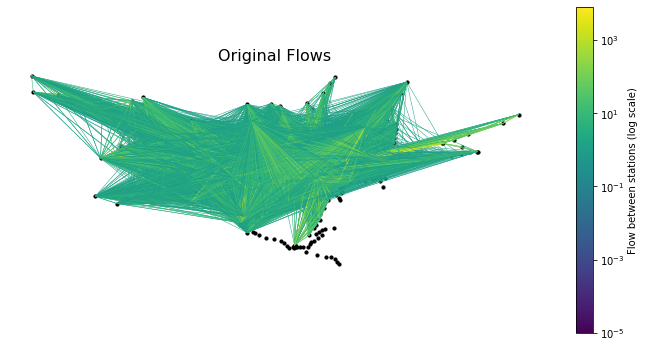

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1445: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.set_segments(segments)


<Figure size 432x288 with 0 Axes>

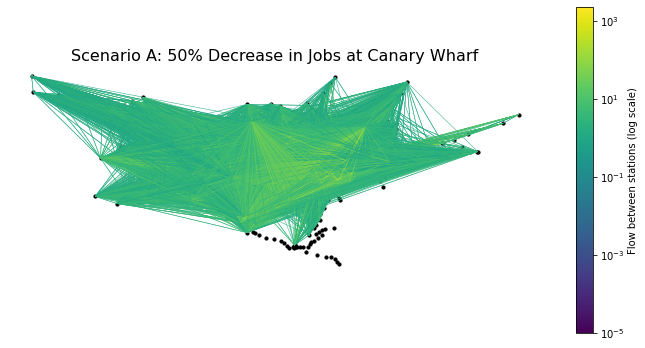

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1445: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.set_segments(segments)


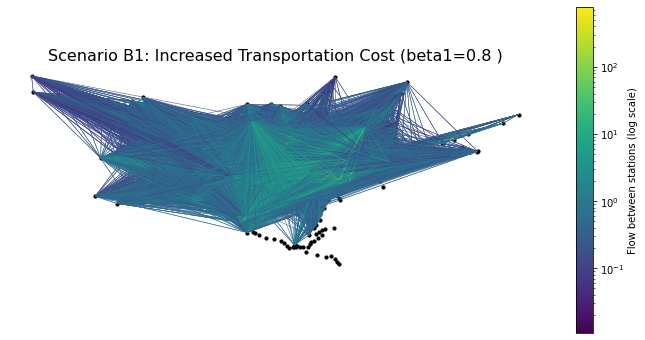

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1445: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  self.set_segments(segments)


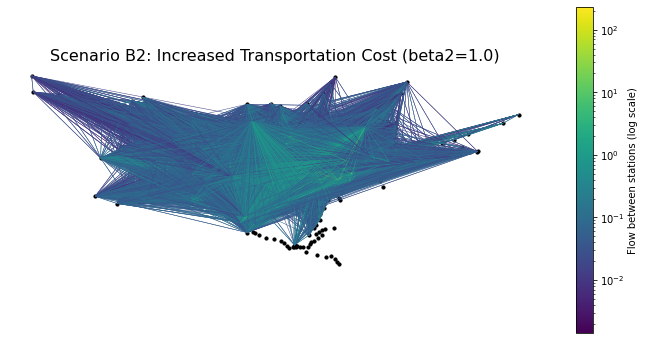

In [238]:
plot_flows(flow_geodataframe_orig, station_locations, 'Original Flows')
plot_flows(flow_geodataframe_A, station_locations, 'Scenario A: 50% Decrease in Jobs at Canary Wharf')
plot_flows(flow_geodataframe_B1, station_locations, 'Scenario B1: Increased Transportation Cost (beta1=0.8 )')
plot_flows(flow_geodataframe_B2, station_locations, 'Scenario B2: Increased Transportation Cost (beta2=1.0)')

Latora, Vito, and Massimo Marchiori. “Efficient behavior of small-world networks.” Physical Review Letters 87.19 (2001): 198701. <https://doi.org/10.1103/PhysRevLett.87.198701>

